In [1]:
import os
os.environ["DALI_DONT_USE_MPI"] = "True"
os.environ["DALI_USE_CUDA"] = "False"
os.environ["DALI_USE_LIBJPEG_TURBO"] = "False"
os.environ["DALI_USE_MKL"] = "False"
os.environ["DALI_USE_NVTX"] = "False"
os.environ["DALI_USE_OPENCV"] = "True"
os.environ["DALI_USE_TBB"] = "True"
os.environ["DALI_USE_CUDA_RTC"] = "False"
os.environ["DALI_BUILD_TYPE"] = "Release"
os.environ["OMP_NUM_THREADS"] = "4"
os.environ["KMP_BLOCKTIME"] = "1"
os.environ["KMP_AFFINITY"]= "granularity=fine,verbose,compact,1,0"


In [2]:
import dpctl

In [22]:
# Importing necessary libraries
import modin.pandas as mpd
from modin.config import Engine
Engine.put("dask")

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.svm import SVC
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [5]:
# Reading the CSV file
data = mpd.read_csv('./data/dataprocess.csv')

To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()



In [6]:
data = data.sample(n=2000, random_state=42)

In [7]:
data.info()

<class 'modin.pandas.dataframe.DataFrame'>
Int64Index: 2000 entries, 6985 to 28518
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ----------------------  --------------  -----  
 0   pH                      2000 non-null   float64
 1   Iron                    2000 non-null   float64
 2   Nitrate                 2000 non-null   float64
 3   Chloride                2000 non-null   float64
 4   Lead                    2000 non-null   float64
 5   Zinc                    2000 non-null   float64
 6   Color                   2000 non-null   object
 7   Turbidity               2000 non-null   float64
 8   Fluoride                2000 non-null   float64
 9   Copper                  2000 non-null   float64
 10  Odor                    2000 non-null   float64
 11  Sulfate                 2000 non-null   float64
 12  Conductivity            2000 non-null   float64
 13  Chlorine                2000 non-null   float64
 14  Manganese               2000 non

In [8]:
data = data.drop('Date', axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encoding the categorical variables as numeric values
label_encoder = LabelEncoder()

# Apply numbers to the Source variable
data['Source'] = label_encoder.fit_transform(data['Source'].astype(str))
# Ground 0, Reservoir 1, Lake 2, River 3, spring 4, Well 5, Aquifer 6, stream 7

# Apply numbers to the Color variable
data['Color'] = label_encoder.fit_transform(data['Color'].astype(str))
# Colorless 0, near colorless 1, faint yellow 2, light yellow 3, Yellow 4


In [10]:
# Split data into features and target
X = data.drop("Target", axis=1)
y = data["Target"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1600, 19)
Shape of X_test: (400, 19)
Shape of y_train: (1600,)
Shape of y_test: (400,)


In [12]:
# Define XGBoost model and tuning parameters
xgb_model = xgb.XGBClassifier()
xgb_params = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'colsample_bytree': [0.5, 0.7, 1],
}

In [13]:
# Define SVM model and tuning parameters
svm_model = SVC()
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
}

In [14]:
# Define CNN model
cnn_model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
# Compile CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train and evaluate XGBoost model
print("Training XGBoost model...")
xgb_grid = GridSearchCV(xgb_model, xgb_params, scoring='accuracy', n_jobs=-1, cv=5)
xgb_grid.fit(X_train, y_train)
print("XGBoost model training complete.")



Training XGBoost model...
XGBoost model training complete.
Making predictions using XGBoost model...


NameError: name 'config_context' is not defined

In [17]:
print("Making predictions using XGBoost model...")
xgb_pred = xgb_grid.predict(X_test)
print("Prediction with XGBoost model complete.")

xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)

print("XGBoost model evaluation complete.")


Making predictions using XGBoost model...
Prediction with XGBoost model complete.
XGBoost model evaluation complete.


In [18]:
# Train and evaluate SVM model
print("Training SVM model...")
svm_grid = GridSearchCV(svm_model, svm_params, scoring='accuracy', n_jobs=-1, cv=5)
svm_grid.fit(X_train, y_train)
print("XGBoost model training complete.")

print("Making predictions using SVM model...")
svm_pred = svm_grid.predict(X_test)
print("Prediction with SVM model complete.")

svm_acc = accuracy_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
print("SVM model evaluation complete.")

Training SVM model...
XGBoost model training complete.
Making predictions using SVM model...
Prediction with SVM model complete.
SVM model evaluation complete.


In [52]:
import numpy as np

# example input array of size 30400
X_train_np = np.random.rand(30400)

# compute the number of zeros to pad
pad_size = (1600 * 28 * 28 * 1) - X_train_np.size

# pad the array with zeros
X_train_np = np.pad(X_train_np, (0, pad_size), 'constant')

# reshape the array
X_train_np = np.reshape(X_train_np, (1600, 28, 28, 1))


In [41]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
loss = 'categorical_crossentropy'

cnn_model.compile(optimizer=optimizer, loss=loss)


In [57]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np

# Convert data to pandas dataframes/series
X_train_df = pd.DataFrame(X_train_np)
y_train_df = pd.Series(y_train_np)
X_test_df = pd.DataFrame(X_test_np)
y_test_df = pd.Series(y_test_np)

# Define the CNN model
model = keras.Sequential([
    layers.Reshape((19, 1), input_shape=(19,)),
    layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_df, y_train_df, epochs=150, validation_data=(X_test_df, y_test_df))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_df, y_test_df)
print('Test accuracy:', test_acc)


Epoch 1/150
50/50 [==============================] - 1s 9ms/step - loss: 3.7996 - accuracy: 0.5944 - val_loss: 0.7916 - val_accuracy: 0.7000
Epoch 2/150
50/50 [==============================] - 0s 3ms/step - loss: 0.7225 - accuracy: 0.6612 - val_loss: 0.6272 - val_accuracy: 0.7000
Epoch 3/150
50/50 [==============================] - 0s 5ms/step - loss: 0.6374 - accuracy: 0.7038 - val_loss: 0.6225 - val_accuracy: 0.7050
Epoch 4/150
50/50 [==============================] - 0s 3ms/step - loss: 0.6320 - accuracy: 0.7119 - val_loss: 0.6210 - val_accuracy: 0.7050
Epoch 5/150
50/50 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.7038 - val_loss: 0.6229 - val_accuracy: 0.7000
Epoch 6/150
50/50 [==============================] - 0s 5ms/step - loss: 0.6297 - accuracy: 0.7050 - val_loss: 0.6187 - val_accuracy: 0.7025
Epoch 7/150
50/50 [==============================] - 0s 3ms/step - loss: 0.6265 - accuracy: 0.7125 - val_loss: 0.6129 - val_accuracy: 0.7000
Epoch 8/150
5

Epoch 59/150
50/50 [==============================] - 0s 3ms/step - loss: 0.5964 - accuracy: 0.7050 - val_loss: 0.5966 - val_accuracy: 0.7150
Epoch 60/150
50/50 [==============================] - 0s 5ms/step - loss: 0.5901 - accuracy: 0.7088 - val_loss: 0.6031 - val_accuracy: 0.7100
Epoch 61/150
50/50 [==============================] - 0s 3ms/step - loss: 0.5941 - accuracy: 0.7131 - val_loss: 0.5948 - val_accuracy: 0.7075
Epoch 62/150
50/50 [==============================] - 0s 3ms/step - loss: 0.5949 - accuracy: 0.7088 - val_loss: 0.6023 - val_accuracy: 0.7025
Epoch 63/150
50/50 [==============================] - 0s 5ms/step - loss: 0.5914 - accuracy: 0.7237 - val_loss: 0.5927 - val_accuracy: 0.7050
Epoch 64/150
50/50 [==============================] - 0s 3ms/step - loss: 0.5930 - accuracy: 0.7119 - val_loss: 0.5985 - val_accuracy: 0.7075
Epoch 65/150
50/50 [==============================] - 0s 3ms/step - loss: 0.5936 - accuracy: 0.7081 - val_loss: 0.5907 - val_accuracy: 0.7100
Epoch 

In [65]:
# Define the CNN model
# model = keras.Sequential([
#     layers.Reshape((19, 1), input_shape=(19,)),
#     layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Flatten(),
#     layers.Dense(units=512, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(units=1, activation='sigmoid')
# ])

model = keras.Sequential([
    layers.Reshape((19, 1), input_shape=(19,)),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_df, y_train_df, epochs=200, validation_data=(X_test_df, y_test_df))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_df, y_test_df)
print('Test accuracy:', test_acc)


Epoch 1/200
50/50 [==============================] - 5s 27ms/step - loss: 0.8283 - accuracy: 0.6444 - val_loss: 0.9271 - val_accuracy: 0.3050
Epoch 2/200
50/50 [==============================] - 1s 18ms/step - loss: 0.6753 - accuracy: 0.6681 - val_loss: 0.6436 - val_accuracy: 0.6425
Epoch 3/200
50/50 [==============================] - 1s 17ms/step - loss: 0.6126 - accuracy: 0.7044 - val_loss: 0.6211 - val_accuracy: 0.7250
Epoch 4/200
50/50 [==============================] - 1s 16ms/step - loss: 0.6123 - accuracy: 0.7138 - val_loss: 0.5964 - val_accuracy: 0.7475
Epoch 5/200
50/50 [==============================] - 1s 17ms/step - loss: 0.6059 - accuracy: 0.7063 - val_loss: 0.5924 - val_accuracy: 0.7525
Epoch 6/200
50/50 [==============================] - 1s 17ms/step - loss: 0.5899 - accuracy: 0.7231 - val_loss: 0.5828 - val_accuracy: 0.7150
Epoch 7/200
50/50 [==============================] - 1s 15ms/step - loss: 0.5894 - accuracy: 0.7212 - val_loss: 0.6130 - val_accuracy: 0.7250
Epoch 

50/50 [==============================] - 1s 19ms/step - loss: 0.0884 - accuracy: 0.9731 - val_loss: 0.9007 - val_accuracy: 0.8075
Epoch 116/200
50/50 [==============================] - 1s 19ms/step - loss: 0.0513 - accuracy: 0.9831 - val_loss: 1.2447 - val_accuracy: 0.7850
Epoch 117/200
50/50 [==============================] - 1s 16ms/step - loss: 0.0656 - accuracy: 0.9831 - val_loss: 1.1201 - val_accuracy: 0.7850
Epoch 118/200
50/50 [==============================] - 1s 17ms/step - loss: 0.0530 - accuracy: 0.9825 - val_loss: 1.0943 - val_accuracy: 0.7775
Epoch 119/200
50/50 [==============================] - 1s 17ms/step - loss: 0.0459 - accuracy: 0.9844 - val_loss: 1.2308 - val_accuracy: 0.8100
Epoch 120/200
50/50 [==============================] - 1s 17ms/step - loss: 0.1054 - accuracy: 0.9663 - val_loss: 0.9075 - val_accuracy: 0.8075
Epoch 121/200
50/50 [==============================] - 1s 18ms/step - loss: 0.0469 - accuracy: 0.9831 - val_loss: 1.2510 - val_accuracy: 0.7600
Epoch 

Epoch 172/200
50/50 [==============================] - 1s 18ms/step - loss: 0.0304 - accuracy: 0.9944 - val_loss: 1.3752 - val_accuracy: 0.8100
Epoch 173/200
50/50 [==============================] - 1s 16ms/step - loss: 0.0195 - accuracy: 0.9956 - val_loss: 1.4575 - val_accuracy: 0.8075
Epoch 174/200
50/50 [==============================] - 1s 17ms/step - loss: 0.0694 - accuracy: 0.9775 - val_loss: 1.0025 - val_accuracy: 0.7875
Epoch 175/200
50/50 [==============================] - 1s 18ms/step - loss: 0.0575 - accuracy: 0.9862 - val_loss: 1.2077 - val_accuracy: 0.7950
Epoch 176/200
50/50 [==============================] - 1s 16ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 1.3789 - val_accuracy: 0.8025
Epoch 177/200
50/50 [==============================] - 1s 17ms/step - loss: 0.0227 - accuracy: 0.9950 - val_loss: 1.5014 - val_accuracy: 0.8100
Epoch 178/200
50/50 [==============================] - 1s 18ms/step - loss: 0.0280 - accuracy: 0.9906 - val_loss: 1.7271 - val_accuracy:

In [69]:
print("Making predictions using CNN model...")
cnn_pred = np.argmax(model.predict(X_test_df), axis=-1)
print("Prediction with CNN model complete.")

cnn_acc = accuracy_score(y_test_df, cnn_pred)
cnn_recall = recall_score(y_test_df, cnn_pred)
cnn_precision = precision_score(y_test_df, cnn_pred)
cnn_f1 = f1_score(y_test_df, cnn_pred)
cnn_cm = confusion_matrix(y_test_df, cnn_pred)
print("CNN model evaluation complete.")


Making predictions using CNN model...
13/13 [==============================] - 0s 5ms/step
Prediction with CNN model complete.
CNN model evaluation complete.


In [70]:
# Print evaluation metrics for all models
print("Evaluation Metrics")
print("===================================")
print("Model\t\tAccuracy\tRecall\t\tPrecision\tF1 Score")
print("XGBoost\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(xgb_acc, xgb_recall, xgb_precision, xgb_f1))
print("SVM\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(svm_acc, svm_recall, svm_precision, svm_f1))
print("CNN\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(cnn_acc, cnn_recall, cnn_precision, cnn_f1))

Evaluation Metrics
Model		Accuracy	Recall		Precision	F1 Score
XGBoost		0.8700		0.8443		0.7574		0.7984
SVM		0.8275		0.5820		0.7978		0.6730
CNN		0.6950		0.0000		0.0000		0.0000


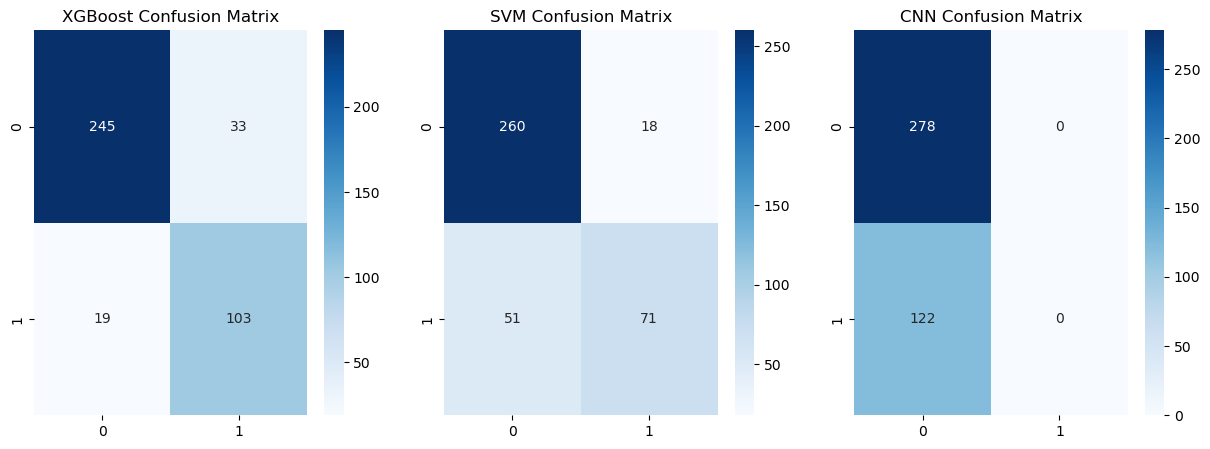

In [72]:
# Plot confusion matrices for all models
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title("XGBoost Confusion Matrix")
sns.heatmap(xgb_cm, annot=True, cmap="Blues", ax=axs[0], fmt="d")
axs[1].set_title("SVM Confusion Matrix")
sns.heatmap(svm_cm, annot=True, cmap="Blues", ax=axs[1], fmt="d")
axs[2].set_title("CNN Confusion Matrix")
sns.heatmap(cnn_cm, annot=True, cmap="Blues", ax=axs[2], fmt="d")
plt.show()

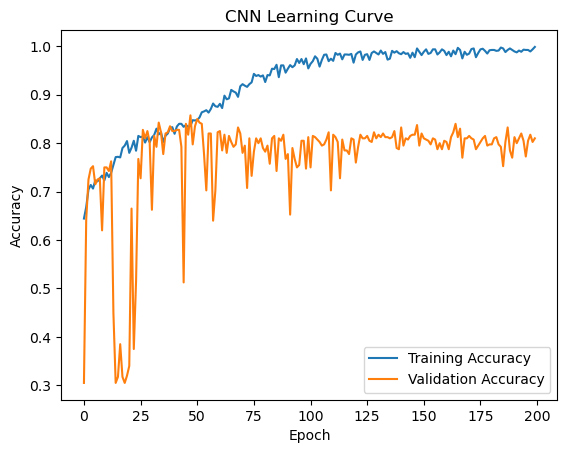

In [67]:
# Plot learning curves for CNN model
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Learning Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()